In [108]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.metrics import average_precision_score
from xgboost.sklearn import XGBClassifier
from xgboost import plot_importance
import pickle
%matplotlib inline

In [50]:
crf_data = pd.read_csv("C:/Users/Ashkan Golgoon/Credit-Fraud-Detection-XGBoost.csv")

In [51]:
crf_data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [52]:
crf_data = crf_data.rename(columns = {'oldbalanceOrg': 'oldBalanceOrig', 'newbalanceOrig':'newBalanceOrig', 
                                    'oldbalanceDest':'oldBalanceDest', 'newbalanceDest' : 'newBalanceDest'})

In [53]:
crf_data.head()

,step,type,amount,nameOrig,oldBalanceOrig,newBalanceOrig,nameDest,oldBalanceDest,newBalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [54]:
crf_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
step              int64
type              object
amount            float64
nameOrig          object
oldBalanceOrig    float64
newBalanceOrig    float64
nameDest          object
oldBalanceDest    float64
newBalanceDest    float64
isFraud           int64
isFlaggedFraud    int64
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [55]:
#print(step_list)

In [56]:
step_list = list(crf_data.loc[crf_data.isFraud == 1,'step'])
from collections import Counter
step_counted_list = Counter(step_list)
step_counted_list.most_common(40) #40 most occuring incidents step values

[(212, 40),
 (523, 30),
 (249, 28),
 (387, 28),
 (425, 28),
 (501, 28),
 (730, 28),
 (160, 26),
 (398, 26),
 (66, 24),
 (406, 24),
 (625, 24),
 (694, 24),
 (22, 23),
 (6, 22),
 (34, 22),
 (74, 22),
 (149, 22),
 (250, 22),
 (262, 22),
 (279, 22),
 (296, 22),
 (680, 22),
 (726, 22),
 (741, 22),
 (47, 21),
 (208, 21),
 (15, 20),
 (58, 20),
 (59, 20),
 (65, 20),
 (69, 20),
 (71, 20),
 (261, 20),
 (273, 20),
 (274, 20),
 (317, 20),
 (362, 20),
 (409, 20),
 (410, 20)]

In [57]:
type_list = list(crf_data.loc[crf_data.isFraud == 1, 'type'])

type_counted_list = Counter(type_list)
type_counted_list.most_common(20)

[('CASH_OUT', 4116), ('TRANSFER', 4097)]

In [58]:
amount_list = list(crf_data.loc[crf_data.isFraud == 1, 'amount'])

amount_counted_list = Counter(amount_list)
amount_counted_list.most_common(20)

[(10000000.0, 287),
 (0.0, 16),
 (429257.45, 4),
 (1165187.89, 4),
 (181.0, 2),
 (2806.0, 2),
 (20128.0, 2),
 (1277212.77, 2),
 (35063.63, 2),
 (25071.46, 2),
 (235238.66, 2),
 (1096187.24, 2),
 (963532.14, 2),
 (14949.84, 2),
 (18627.02, 2),
 (10539.37, 2),
 (22877.0, 2),
 (2930418.44, 2),
 (169941.73, 2),
 (13707.11, 2)]

In [59]:
nameOrig_list = list(crf_data.loc[crf_data.isFraud == 1, 'nameOrig'])

nameOrig_counted_list = Counter(nameOrig_list)
nameOrig_counted_list.most_common(20)

[('C1305486145', 1),
 ('C840083671', 1),
 ('C1420196421', 1),
 ('C2101527076', 1),
 ('C137533655', 1),
 ('C1118430673', 1),
 ('C749981943', 1),
 ('C1334405552', 1),
 ('C467632528', 1),
 ('C1364127192', 1),
 ('C1635772897', 1),
 ('C669700766', 1),
 ('C1275464847', 1),
 ('C13692003', 1),
 ('C1872047468', 1),
 ('C1499825229', 1),
 ('C1093223281', 1),
 ('C77163673', 1),
 ('C1440057381', 1),
 ('C430329518', 1)]

In [60]:
#drop this

In [61]:
oldBalanceOrig_list = list(crf_data.loc[crf_data.isFraud == 1,'oldBalanceOrig'])

oldBalanceOrig_counted_list = Counter(oldBalanceOrig_list)
oldBalanceOrig_counted_list.most_common(20)

[(10000000.0, 142),
 (0.0, 41),
 (429257.45, 4),
 (1165187.89, 4),
 (181.0, 2),
 (2806.0, 2),
 (20128.0, 2),
 (1277212.77, 2),
 (35063.63, 2),
 (25071.46, 2),
 (235238.66, 2),
 (1096187.24, 2),
 (963532.14, 2),
 (14949.84, 2),
 (18627.02, 2),
 (10539.37, 2),
 (22877.0, 2),
 (2930418.44, 2),
 (169941.73, 2),
 (13707.11, 2)]

In [62]:
newBalanceOrig_list = list(crf_data.loc[crf_data.isFraud == 1,'newBalanceOrig'])

newBalanceOrig_counted_list = Counter(newBalanceOrig_list)
newBalanceOrig_counted_list.most_common(20)

[(0.0, 8053),
 (19585040.37, 3),
 (10399045.08, 3),
 (17316255.05, 3),
 (4953893.08, 2),
 (1343002.08, 2),
 (536624.41, 2),
 (4892193.09, 2),
 (3576297.1, 2),
 (353874.22, 2),
 (2542664.27, 2),
 (3441041.46, 2),
 (3171085.59, 2),
 (5674547.89, 2),
 (2930418.44, 1),
 (442917.67, 1),
 (298767.61, 1),
 (1861008.32, 1),
 (9887819.06, 1),
 (8594065.09, 1)]

In [63]:
nameDest_list = list(crf_data.loc[crf_data.isFraud == 1,'nameDest'])

nameDest_counted_list = Counter(nameDest_list)
nameDest_counted_list.most_common(20)

[('C410033330', 2),
 ('C803116137', 2),
 ('C904300960', 2),
 ('C1013511446', 2),
 ('C2020337583', 2),
 ('C200064275', 2),
 ('C185805228', 2),
 ('C52390890', 2),
 ('C935310781', 2),
 ('C1827219533', 2),
 ('C104038589', 2),
 ('C1259079602', 2),
 ('C475338087', 2),
 ('C1981613973', 2),
 ('C644163395', 2),
 ('C1366192319', 2),
 ('C1325541393', 2),
 ('C1601170327', 2),
 ('C1656842502', 2),
 ('C967226405', 2)]

In [64]:
#drop this

In [65]:
oldBalanceDest_list = list(crf_data.loc[crf_data.isFraud == 1,'oldBalanceDest'])

oldBalanceDest_counted_list = Counter(oldBalanceDest_list)
oldBalanceDest_counted_list.most_common(20)

[(0.0, 5351),
 (21182.0, 1),
 (26202.0, 1),
 (6268.0, 1),
 (102.0, 1),
 (31140.0, 1),
 (9083.76, 1),
 (132382.57, 1),
 (18161.79, 1),
 (147251.58, 1),
 (3616012.1, 1),
 (13010502.78, 1),
 (31002.0, 1),
 (98152.0, 1),
 (101976.0, 1),
 (10097.0, 1),
 (6244.44, 1),
 (36275.0, 1),
 (11170.0, 1),
 (3382.84, 1)]

In [66]:
newBalanceDest_list = list(crf_data.loc[crf_data.isFraud == 1,'newBalanceDest'])

newBalanceDest_counted_list = Counter(newBalanceDest_list)
newBalanceDest_counted_list.most_common(20)

[(0.0, 4091),
 (10000000.0, 53),
 (127905.82, 2),
 (429257.45, 2),
 (1064995.85, 2),
 (1165187.89, 2),
 (12145.85, 1),
 (9291619.62, 1),
 (2444985.19, 1),
 (7550.03, 1),
 (34155.22, 1),
 (132842.64, 1),
 (235238.66, 1),
 (1096187.24, 1),
 (1095914.71, 1),
 (33111.63, 1),
 (165878.6, 1),
 (10539.37, 1),
 (22877.0, 1),
 (9941904.21, 1)]

In [97]:
isFlaggedFraud_list = list(crf_data.loc[crf_data.isFraud == 1,'isFlaggedFraud'])
randomState = 5
np.random.seed(randomState)
isFlaggedFraud_counted_list = Counter(isFlaggedFraud_list)
isFlaggedFraud_counted_list.most_common(20)

[(0, 8197), (1, 16)]

In [68]:
#Drop this

In [98]:
X = crf_data.loc[(crf_data.type == 'CASH_OUT') | (crf_data.type == 'TRANSFER')]

In [99]:
X.shape

(2770409, 11)

In [71]:
X.head()

,step,type,amount,nameOrig,oldBalanceOrig,newBalanceOrig,nameDest,oldBalanceDest,newBalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1,0
15,1,CASH_OUT,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0,0
19,1,TRANSFER,215310.30,C1670993182,705.0,0.0,C1100439041,22425.0,0.00,0,0
24,1,TRANSFER,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0,0


In [100]:
X = X.drop(['nameDest','nameOrig','isFlaggedFraud'], axis=1)

In [101]:
X.head()

,step,type,amount,oldBalanceOrig,newBalanceOrig,oldBalanceDest,newBalanceDest,isFraud
2,1,TRANSFER,181.00,181.0,0.0,0.0,0.00,1
3,1,CASH_OUT,181.00,181.0,0.0,21182.0,0.00,1
15,1,CASH_OUT,229133.94,15325.0,0.0,5083.0,51513.44,0
19,1,TRANSFER,215310.30,705.0,0.0,22425.0,0.00,0
24,1,TRANSFER,311685.89,10835.0,0.0,6267.0,2719172.89,0


In [102]:
X.loc[X.type == 'TRANSFER', 'type'] = 0
X.loc[X.type == 'CASH_OUT', 'type'] = 1

In [75]:
X.head()

,step,type,amount,oldBalanceOrig,newBalanceOrig,oldBalanceDest,newBalanceDest,isFraud
2,1,0,181.00,181.0,0.0,0.0,0.00,1
3,1,1,181.00,181.0,0.0,21182.0,0.00,1
15,1,1,229133.94,15325.0,0.0,5083.0,51513.44,0
19,1,0,215310.30,705.0,0.0,22425.0,0.00,0
24,1,0,311685.89,10835.0,0.0,6267.0,2719172.89,0


In [76]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2770409 entries, 2 to 6362619
Data columns (total 8 columns):
step              int64
type              int64
amount            float64
oldBalanceOrig    float64
newBalanceOrig    float64
oldBalanceDest    float64
newBalanceDest    float64
isFraud           int64
dtypes: float64(5), int64(3)
memory usage: 190.2 MB


In [77]:
X.head()

,step,type,amount,oldBalanceOrig,newBalanceOrig,oldBalanceDest,newBalanceDest,isFraud
2,1,0,181.00,181.0,0.0,0.0,0.00,1
3,1,1,181.00,181.0,0.0,21182.0,0.00,1
15,1,1,229133.94,15325.0,0.0,5083.0,51513.44,0
19,1,0,215310.30,705.0,0.0,22425.0,0.00,0
24,1,0,311685.89,10835.0,0.0,6267.0,2719172.89,0


In [78]:
X.type = X.type.astype(int)

In [91]:
Y = X['isFraud']

In [94]:
Y.head()

2     1
3     1
15    0
19    0
24    0
Name: isFraud, dtype: int64

In [79]:
X_notFraud= X.loc[X.isFraud == 0]

In [80]:
X_fraud = X.loc[X.isFraud == 1]

In [82]:
X_fraud.shape

(8213, 8)

In [83]:
X_notFraud.shape

(2762196, 8)

In [103]:
X = X.drop(['isFraud'], axis=1)

In [84]:
X_fraud = X_fraud.drop(['isFraud'], axis=1)

In [85]:
X_notFraud = X_notFraud.drop(['isFraud'], axis=1)

In [89]:
print(X_fraud.shape)

(8213, 7)


In [90]:
print('skewness = {}'.format(len(X_fraud)/float(len(X))))

skewness = 0.002964544224336551


In [104]:
#Split the data into training and test sets in a 80%-20% ratio
randomState = 5
np.random.seed(randomState)

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = randomState)

weights = (Y==0).sum()/(1.0 * (Y==1).sum())
xgb_classifier1 = XGBClassifier(max_depth = 3, scale_pos_weight = weights, n_jobs = 4)
xgb_prediction1 = xgb_classifier1.fit(X_train, Y_train).predict_proba(X_test) #training the model

print('AUPRC = {}'.format(average_precision_score(Y_test, xgb_prediction1[:,1])))

AUPRC = 0.8973938194567287


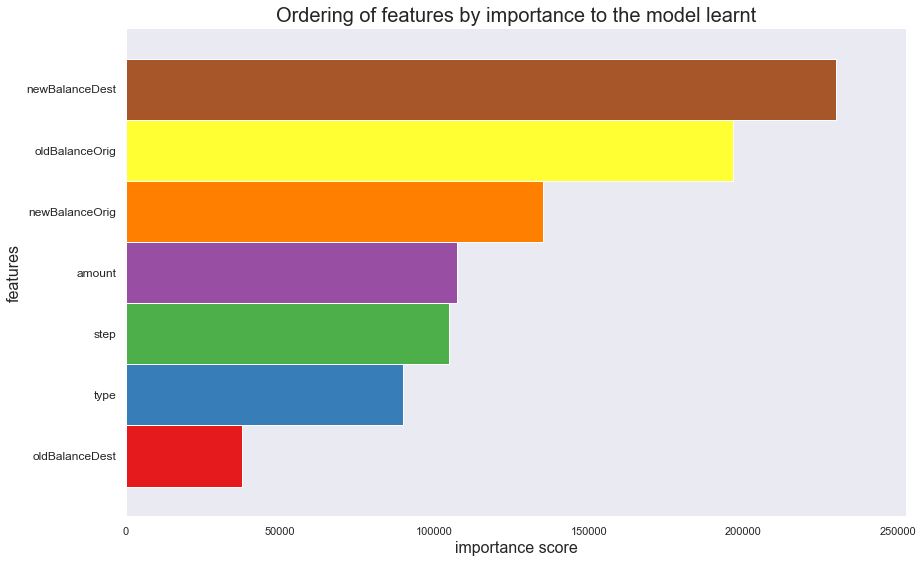

In [105]:
fig = plt.figure(figsize = (14, 9))
ax = fig.add_subplot(111)

colours = plt.cm.Set1(np.linspace(0, 1, 9))

ax = plot_importance(xgb_classifier1, height = 1, color = colours, grid = False, \
                     show_values = False, importance_type = 'cover', ax = ax);
for axis in ['top','bottom','left','right']:
            ax.spines[axis].set_linewidth(2)
        
ax.set_xlabel('importance score', size = 16);
ax.set_ylabel('features', size = 16);
ax.set_yticklabels(ax.get_yticklabels(), size = 12);
ax.set_title('Ordering of features by importance to the model learnt', size = 20);

In [109]:
pickle.dump(xgb_prediction1, open("fraud.pickle.dat", "wb"))